## Gradients

In [ ]:
import torch

#### Calculate Gradients

In [11]:
# Tensor with requires_grad to keep track of gradient [X will we optimized]--> later you will need to compute d.../dx
x=torch.ones(3,requires_grad=True)
print(x)

y=2*x
print(y)

mean=y.mean() #Scalar to compute derivative on --> like the error or loss :D 
# Else we will need to use Jacobian Matrix
print(mean)


# Cal Gradient
mean.backward()#dmean/dx
# mean=1/3*(2x1+2x2+2x3)
# dmean/dx=[dmean/dx1,dmean/dx2,dmean/dx3]
# dmean/dx=[2/3,2/3,2/3] = [0.667,0.667,0.667]
print(x.grad)


tensor([1., 1., 1.], requires_grad=True)
tensor([2., 2., 2.], grad_fn=<MulBackward0>)
tensor(2., grad_fn=<MeanBackward0>)
tensor([0.6667, 0.6667, 0.6667])


##### Fn: y=2+x
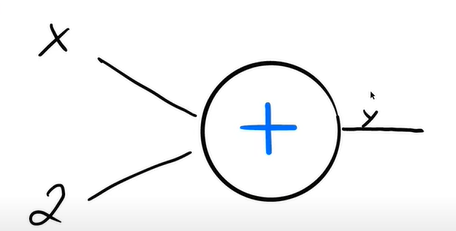
##### 📝📝  The absence of requires_grad=True indicates to PyTorch that you don't intend to compute gradients for this tensor, and as a result, PyTorch does not build the computation graph for it.


In [14]:
# It creates computation Graph
x=torch.tensor([1.0,2.0,3.0],requires_grad=True)
print(x)

y=x**2
print(y)
y=y.mean()
print(y)

# Cal Gradient
y.backward()#dy/dx
# dy/dx=[2/3*x1,2/3*x2,2/3*x3]= [2/3(1),2/3(2),2/3(3)]
print(x.grad)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 4., 9.], grad_fn=<PowBackward0>)
tensor(4.6667, grad_fn=<MeanBackward0>)
tensor([0.6667, 1.3333, 2.0000])


#### Stop Tracking Gradients

In [33]:
# Method(1) requires_grad_
x=torch.rand(3,requires_grad=True)
print(x)

x.requires_grad_(False)
print(x)

# Method(2) detach()
x=torch.randn(3,requires_grad=True)
print(x)

y=x.detach() #creates new copy of torch x 
print(y)



# Method(3) detach()
x=torch.randn(3,requires_grad=True)
print(x)

with torch.no_grad():
    y=x+2  # y doesn't have the gradient function :D
    print(y)
# else
z=x+2 # will have the gradient function
print(z)



tensor([0.6824, 0.0270, 0.2534], requires_grad=True)
tensor([0.6824, 0.0270, 0.2534])
tensor([-0.8244,  1.1201,  0.7721], requires_grad=True)
tensor([-0.8244,  1.1201,  0.7721])
tensor([ 0.2082, -1.2758, -1.5066], requires_grad=True)
tensor([2.2082, 0.7242, 0.4934])
tensor([2.2082, 0.7242, 0.4934], grad_fn=<AddBackward0>)


#### Accumlated Gradients

In [18]:
print("Wrong:")
# Gradients are accumlated when calling the backward function
weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
    model_output=(weights*3).sum()

    model_output.backward() # Add new gradients to the previous ones [accumlate]

    print(weights.grad)

print("Correct:")
# SOL: zero the grads after each epoch
weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
    model_output=(weights*3).sum()

    model_output.backward() # Add new gradients to the previous ones [accumlate]

    print(weights.grad)

    weights.grad.zero_()

Wrong:
tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
Correct:
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
